# Data Gathering

In [1]:
from config import app_id, api_key

from bs4 import BeautifulSoup as BS
import requests
import json
import time
import datetime

import pandas as pd
import numpy as np
import datetime

from nltk.sentiment.vader import SentimentIntensityAnalyzer

from textblob import TextBlob

import matplotlib.pyplot as plt
import seaborn           as sns
sns.set_style("darkgrid")

## The New York Times: API Requests

In [4]:
# function to request 10 articles (1 page of results) containing 'tesla' from NY Times API
# sorted from newest to oldest in a requested year
# returns a dictionary containing web URL, article snippet (headline), publication date and lead paragraph
def call_nyt_by_year_and_page(year, page):
    root_url   = 'https://api.nytimes.com/svc/search/v2/articlesearch.json?q=tesla&sort=newest'
    begin_date = '&begin_date={}0101'.format(str(year))
    end_date   = '&end_date={}1231'.format(str(year))
    pagination = '&page={}'.format(str(page))
    doc_params = '&fl=web_url&fl=snippet&fl=pub_date&fl=_id&fl=lead_paragraph'
    
    url        = root_url + begin_date + end_date + pagination + doc_params + '&api-key=' + api_key
    print(url)
    
    response   = requests.get(url)
    
    return response.json()

In [5]:
# request all pages of articles for a single year
# returns a list of article dictionaries
def call_nyt_by_year(year):
    annual_articles = []
    
    # find how many articles (hits) contain 'tesla' in a calendar year
    total_results = call_nyt_by_year_and_page(year,0)
    hits  = total_results['response']['meta']['hits']
    
    # request all available pages
    # sleep 7 seconds to clear NYT API rate limit
    for i in range(int(hits/10)):
        query = call_nyt_by_year_and_page(year,i)
        annual_articles = annual_articles + query['response']['docs']
        time.sleep(7)
        
    return annual_articles

In [6]:
# request all pages of articles for all years
# returns a list of article dictionaries
def call_nyt_by_all_years(years):
    all_articles = []
    
    for year in years:
        annual_articles = call_nyt_by_year(year)
        all_articles = all_articles + annual_articles
        time.sleep(7)
        
    return all_articles

In [7]:
# create a list of dictionaries of all NYT articles containing 'tesla from 2010 to 2019'
all_years    = list(range(2010,2020))
all_articles = call_nyt_by_all_years(all_years)

https://api.nytimes.com/svc/search/v2/articlesearch.json?q=tesla&sort=newest&begin_date=20100101&end_date=20101231&page=0&fl=web_url&fl=snippet&fl=pub_date&fl=_id&fl=lead_paragraph&api-key=MLXMoaTgjEozDqGUPJbWBsYQoKCwZ06n
https://api.nytimes.com/svc/search/v2/articlesearch.json?q=tesla&sort=newest&begin_date=20100101&end_date=20101231&page=0&fl=web_url&fl=snippet&fl=pub_date&fl=_id&fl=lead_paragraph&api-key=MLXMoaTgjEozDqGUPJbWBsYQoKCwZ06n
https://api.nytimes.com/svc/search/v2/articlesearch.json?q=tesla&sort=newest&begin_date=20100101&end_date=20101231&page=1&fl=web_url&fl=snippet&fl=pub_date&fl=_id&fl=lead_paragraph&api-key=MLXMoaTgjEozDqGUPJbWBsYQoKCwZ06n
https://api.nytimes.com/svc/search/v2/articlesearch.json?q=tesla&sort=newest&begin_date=20100101&end_date=20101231&page=2&fl=web_url&fl=snippet&fl=pub_date&fl=_id&fl=lead_paragraph&api-key=MLXMoaTgjEozDqGUPJbWBsYQoKCwZ06n
https://api.nytimes.com/svc/search/v2/articlesearch.json?q=tesla&sort=newest&begin_date=20100101&end_date=201012

https://api.nytimes.com/svc/search/v2/articlesearch.json?q=tesla&sort=newest&begin_date=20120101&end_date=20121231&page=8&fl=web_url&fl=snippet&fl=pub_date&fl=_id&fl=lead_paragraph&api-key=MLXMoaTgjEozDqGUPJbWBsYQoKCwZ06n
https://api.nytimes.com/svc/search/v2/articlesearch.json?q=tesla&sort=newest&begin_date=20120101&end_date=20121231&page=9&fl=web_url&fl=snippet&fl=pub_date&fl=_id&fl=lead_paragraph&api-key=MLXMoaTgjEozDqGUPJbWBsYQoKCwZ06n
https://api.nytimes.com/svc/search/v2/articlesearch.json?q=tesla&sort=newest&begin_date=20120101&end_date=20121231&page=10&fl=web_url&fl=snippet&fl=pub_date&fl=_id&fl=lead_paragraph&api-key=MLXMoaTgjEozDqGUPJbWBsYQoKCwZ06n
https://api.nytimes.com/svc/search/v2/articlesearch.json?q=tesla&sort=newest&begin_date=20120101&end_date=20121231&page=11&fl=web_url&fl=snippet&fl=pub_date&fl=_id&fl=lead_paragraph&api-key=MLXMoaTgjEozDqGUPJbWBsYQoKCwZ06n
https://api.nytimes.com/svc/search/v2/articlesearch.json?q=tesla&sort=newest&begin_date=20120101&end_date=2012

https://api.nytimes.com/svc/search/v2/articlesearch.json?q=tesla&sort=newest&begin_date=20140101&end_date=20141231&page=8&fl=web_url&fl=snippet&fl=pub_date&fl=_id&fl=lead_paragraph&api-key=MLXMoaTgjEozDqGUPJbWBsYQoKCwZ06n
https://api.nytimes.com/svc/search/v2/articlesearch.json?q=tesla&sort=newest&begin_date=20140101&end_date=20141231&page=9&fl=web_url&fl=snippet&fl=pub_date&fl=_id&fl=lead_paragraph&api-key=MLXMoaTgjEozDqGUPJbWBsYQoKCwZ06n
https://api.nytimes.com/svc/search/v2/articlesearch.json?q=tesla&sort=newest&begin_date=20140101&end_date=20141231&page=10&fl=web_url&fl=snippet&fl=pub_date&fl=_id&fl=lead_paragraph&api-key=MLXMoaTgjEozDqGUPJbWBsYQoKCwZ06n
https://api.nytimes.com/svc/search/v2/articlesearch.json?q=tesla&sort=newest&begin_date=20140101&end_date=20141231&page=11&fl=web_url&fl=snippet&fl=pub_date&fl=_id&fl=lead_paragraph&api-key=MLXMoaTgjEozDqGUPJbWBsYQoKCwZ06n
https://api.nytimes.com/svc/search/v2/articlesearch.json?q=tesla&sort=newest&begin_date=20140101&end_date=2014

https://api.nytimes.com/svc/search/v2/articlesearch.json?q=tesla&sort=newest&begin_date=20150101&end_date=20151231&page=20&fl=web_url&fl=snippet&fl=pub_date&fl=_id&fl=lead_paragraph&api-key=MLXMoaTgjEozDqGUPJbWBsYQoKCwZ06n
https://api.nytimes.com/svc/search/v2/articlesearch.json?q=tesla&sort=newest&begin_date=20150101&end_date=20151231&page=21&fl=web_url&fl=snippet&fl=pub_date&fl=_id&fl=lead_paragraph&api-key=MLXMoaTgjEozDqGUPJbWBsYQoKCwZ06n
https://api.nytimes.com/svc/search/v2/articlesearch.json?q=tesla&sort=newest&begin_date=20160101&end_date=20161231&page=0&fl=web_url&fl=snippet&fl=pub_date&fl=_id&fl=lead_paragraph&api-key=MLXMoaTgjEozDqGUPJbWBsYQoKCwZ06n
https://api.nytimes.com/svc/search/v2/articlesearch.json?q=tesla&sort=newest&begin_date=20160101&end_date=20161231&page=0&fl=web_url&fl=snippet&fl=pub_date&fl=_id&fl=lead_paragraph&api-key=MLXMoaTgjEozDqGUPJbWBsYQoKCwZ06n
https://api.nytimes.com/svc/search/v2/articlesearch.json?q=tesla&sort=newest&begin_date=20160101&end_date=2016

https://api.nytimes.com/svc/search/v2/articlesearch.json?q=tesla&sort=newest&begin_date=20170101&end_date=20171231&page=4&fl=web_url&fl=snippet&fl=pub_date&fl=_id&fl=lead_paragraph&api-key=MLXMoaTgjEozDqGUPJbWBsYQoKCwZ06n
https://api.nytimes.com/svc/search/v2/articlesearch.json?q=tesla&sort=newest&begin_date=20170101&end_date=20171231&page=5&fl=web_url&fl=snippet&fl=pub_date&fl=_id&fl=lead_paragraph&api-key=MLXMoaTgjEozDqGUPJbWBsYQoKCwZ06n
https://api.nytimes.com/svc/search/v2/articlesearch.json?q=tesla&sort=newest&begin_date=20170101&end_date=20171231&page=6&fl=web_url&fl=snippet&fl=pub_date&fl=_id&fl=lead_paragraph&api-key=MLXMoaTgjEozDqGUPJbWBsYQoKCwZ06n
https://api.nytimes.com/svc/search/v2/articlesearch.json?q=tesla&sort=newest&begin_date=20170101&end_date=20171231&page=7&fl=web_url&fl=snippet&fl=pub_date&fl=_id&fl=lead_paragraph&api-key=MLXMoaTgjEozDqGUPJbWBsYQoKCwZ06n
https://api.nytimes.com/svc/search/v2/articlesearch.json?q=tesla&sort=newest&begin_date=20170101&end_date=201712

https://api.nytimes.com/svc/search/v2/articlesearch.json?q=tesla&sort=newest&begin_date=20180101&end_date=20181231&page=4&fl=web_url&fl=snippet&fl=pub_date&fl=_id&fl=lead_paragraph&api-key=MLXMoaTgjEozDqGUPJbWBsYQoKCwZ06n
https://api.nytimes.com/svc/search/v2/articlesearch.json?q=tesla&sort=newest&begin_date=20180101&end_date=20181231&page=5&fl=web_url&fl=snippet&fl=pub_date&fl=_id&fl=lead_paragraph&api-key=MLXMoaTgjEozDqGUPJbWBsYQoKCwZ06n
https://api.nytimes.com/svc/search/v2/articlesearch.json?q=tesla&sort=newest&begin_date=20180101&end_date=20181231&page=6&fl=web_url&fl=snippet&fl=pub_date&fl=_id&fl=lead_paragraph&api-key=MLXMoaTgjEozDqGUPJbWBsYQoKCwZ06n
https://api.nytimes.com/svc/search/v2/articlesearch.json?q=tesla&sort=newest&begin_date=20180101&end_date=20181231&page=7&fl=web_url&fl=snippet&fl=pub_date&fl=_id&fl=lead_paragraph&api-key=MLXMoaTgjEozDqGUPJbWBsYQoKCwZ06n
https://api.nytimes.com/svc/search/v2/articlesearch.json?q=tesla&sort=newest&begin_date=20180101&end_date=201812

https://api.nytimes.com/svc/search/v2/articlesearch.json?q=tesla&sort=newest&begin_date=20180101&end_date=20181231&page=41&fl=web_url&fl=snippet&fl=pub_date&fl=_id&fl=lead_paragraph&api-key=MLXMoaTgjEozDqGUPJbWBsYQoKCwZ06n
https://api.nytimes.com/svc/search/v2/articlesearch.json?q=tesla&sort=newest&begin_date=20180101&end_date=20181231&page=42&fl=web_url&fl=snippet&fl=pub_date&fl=_id&fl=lead_paragraph&api-key=MLXMoaTgjEozDqGUPJbWBsYQoKCwZ06n
https://api.nytimes.com/svc/search/v2/articlesearch.json?q=tesla&sort=newest&begin_date=20180101&end_date=20181231&page=43&fl=web_url&fl=snippet&fl=pub_date&fl=_id&fl=lead_paragraph&api-key=MLXMoaTgjEozDqGUPJbWBsYQoKCwZ06n
https://api.nytimes.com/svc/search/v2/articlesearch.json?q=tesla&sort=newest&begin_date=20180101&end_date=20181231&page=44&fl=web_url&fl=snippet&fl=pub_date&fl=_id&fl=lead_paragraph&api-key=MLXMoaTgjEozDqGUPJbWBsYQoKCwZ06n
https://api.nytimes.com/svc/search/v2/articlesearch.json?q=tesla&sort=newest&begin_date=20180101&end_date=20

https://api.nytimes.com/svc/search/v2/articlesearch.json?q=tesla&sort=newest&begin_date=20190101&end_date=20191231&page=15&fl=web_url&fl=snippet&fl=pub_date&fl=_id&fl=lead_paragraph&api-key=MLXMoaTgjEozDqGUPJbWBsYQoKCwZ06n
https://api.nytimes.com/svc/search/v2/articlesearch.json?q=tesla&sort=newest&begin_date=20190101&end_date=20191231&page=16&fl=web_url&fl=snippet&fl=pub_date&fl=_id&fl=lead_paragraph&api-key=MLXMoaTgjEozDqGUPJbWBsYQoKCwZ06n
https://api.nytimes.com/svc/search/v2/articlesearch.json?q=tesla&sort=newest&begin_date=20190101&end_date=20191231&page=17&fl=web_url&fl=snippet&fl=pub_date&fl=_id&fl=lead_paragraph&api-key=MLXMoaTgjEozDqGUPJbWBsYQoKCwZ06n
https://api.nytimes.com/svc/search/v2/articlesearch.json?q=tesla&sort=newest&begin_date=20190101&end_date=20191231&page=18&fl=web_url&fl=snippet&fl=pub_date&fl=_id&fl=lead_paragraph&api-key=MLXMoaTgjEozDqGUPJbWBsYQoKCwZ06n
https://api.nytimes.com/svc/search/v2/articlesearch.json?q=tesla&sort=newest&begin_date=20190101&end_date=20

In [8]:
# save and read JSON with raw API results
with open("nyt_api.json", "w") as write_file:
    json.dump(all_articles, write_file)
    
with open("nyt_api.json", "r") as read_file:
    data = json.load(read_file)

## The New York Times: Web Scraping

In [3]:
# web scrape NYT for all articles containing 'tesla' using web URLs from API
# returns article content as string
def get_nyt_text(url):
    # get web URL HTML
    headers = {'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/53.0.2785.143 Safari/537.36'}
    page = requests.get(url, headers=headers,timeout=5)
    page.status_code
    
    # get article content from HTML
    soup = BS(page.content, 'html.parser')
    content = soup.findAll('p', class_ = 'css-18icg9x evys1bk0')
    
    nyt = ''
    for index in range(len(content)):
        nyt += content[index].get_text()
        
    return nyt

In [ ]:
# web scrape all NYT articles and add to JSON
for i in range(len(data)):
    print(i)
    print(data[i]['web_url'])
    data[i]['article'] = get_nyt_text(data[i]['web_url'])

## Natural Language Processing: VADER Sentiment Analysis

In [71]:
# perform sentiment analysis of each article snippet and lead paragraph using VADER sentiment analysis
si = SentimentIntensityAnalyzer()

for i in range(len(data)):
    data[i]['VADER snippet neg']      = si.polarity_scores(data[i]['snippet'])['neg']
    data[i]['VADER snippet neu']      = si.polarity_scores(data[i]['snippet'])['neu']
    data[i]['VADER snippet pos']      = si.polarity_scores(data[i]['snippet'])['pos']
    data[i]['VADER snippet compound'] = si.polarity_scores(data[i]['snippet'])['compound']
    
    data[i]['VADER lead neg']      = si.polarity_scores(data[i]['lead_paragraph'])['neg']
    data[i]['VADER lead neu']      = si.polarity_scores(data[i]['lead_paragraph'])['neu']
    data[i]['VADER lead pos']      = si.polarity_scores(data[i]['lead_paragraph'])['pos']
    data[i]['VADER lead compound'] = si.polarity_scores(data[i]['lead_paragraph'])['compound']

## Natural Language Processing: TextBlob Sentiment Analysis

In [84]:
# perform sentiment analysis of each article snippet, lead paragraph and article using TextBlob sentiment analysis
from textblob import TextBlob

for i in range(len(data)):
    data[i]['TextBlob snippet polarity']     = TextBlob(data[i]['snippet']).sentiment[0]
    data[i]['TextBlob snippet subjectivity'] = TextBlob(data[i]['snippet']).sentiment[1]
    
    data[i]['TextBlob lead polarity']        = TextBlob(data[i]['lead_paragraph']).sentiment[0]
    data[i]['TextBlob lead subjectivity']    = TextBlob(data[i]['lead_paragraph']).sentiment[1]
    
    data[i]['TextBlob article polarity']     = TextBlob(data[i]['article']).sentiment[0]
    data[i]['TextBlob article subjectivity'] = TextBlob(data[i]['article']).sentiment[1]

In [86]:
# save JSON with VADER and TextBlob natural language processing results
with open("nyt_api_and_articles_vader_textblob.json", "w") as write_file:
    json.dump(data, write_file)

## Cleaning, Counting and Aggregating DataFrame Records by Date

In [103]:
# count all web URLs where web scraping could not retrieve article content
null_articles = 0
full_articles = 0

for i in range(len(data)):
    
    if len(data[i]['article']) == 0:
        null_articles += 1
    else:
        full_articles += 1

In [104]:
# number of empty articles
null_articles

711

In [105]:
# number of retrieved articles
full_articles

1829

In [ ]:
# create DataFrame with of NLP sentiment analysis
sentiment = pd.DataFrame(data)
sentiment['date'] = pd.to_datetime(sentiment.pub_date).dt.date
sentiment.head()

In [ ]:
# remove records where article content could not be retrieved from web URLs
sentiment_clean = sentiment[sentiment['TextBlob article subjectivity'] != 0]
sentiment_clean.head()

In [ ]:
# group articles by date
sentiment_clean = sentiment_clean.groupby('date').mean()
sentiment_clean

In [ ]:
# get article counts by date
counts = sentiment_clean.groupby('date').count()
counts['article count'] = counts['_id']
counts = counts[['article count']]
counts

In [ ]:
# merge DataFrames
sentiment_counts = sentiment_clean.merge(counts, left_on='date', right_index=True)
sentiment_counts

In [ ]:
# pickle and save final DataFrame
sentiment_counts.to_pickle("sentiment_counts.pkl")

## Final DataFrame with Sentiment Analysis by Date

In [106]:
# review final DataFrame
sentiment_counts = pd.read_pickle("sentiment_counts.pkl")
sentiment_counts.head()

,TextBlob article polarity,TextBlob article subjectivity,TextBlob lead polarity,TextBlob lead subjectivity,TextBlob snippet polarity,TextBlob snippet subjectivity,VADER lead compound,VADER lead neg,VADER lead neu,VADER lead pos,VADER snippet compound,VADER snippet neg,VADER snippet neu,VADER snippet pos,article count
date,,,,,,,,,,,,,,,
2013-01-25,0.077019,0.467844,0.050000,0.205000,-0.125000,0.700000,0.0258,0.000,0.974,0.026,0.2732,0.0,0.928,0.072,1
2013-02-08,0.068310,0.389184,0.000000,0.000000,0.000000,0.000000,0.2263,0.000,0.951,0.049,0.2263,0.0,0.946,0.054,1
2013-02-09,0.100375,0.400485,-0.022222,0.731481,-0.125000,0.700000,0.0000,0.000,1.000,0.000,0.0000,0.0,1.000,0.000,1
2013-02-22,0.110909,0.506550,0.078788,0.551515,0.416667,0.741667,0.0000,0.000,1.000,0.000,0.6808,0.0,0.833,0.167,1
2013-02-23,0.144676,0.425166,-0.125000,0.125000,0.045455,0.551515,-0.5994,0.135,0.865,0.000,0.0000,0.0,1.000,0.000,1


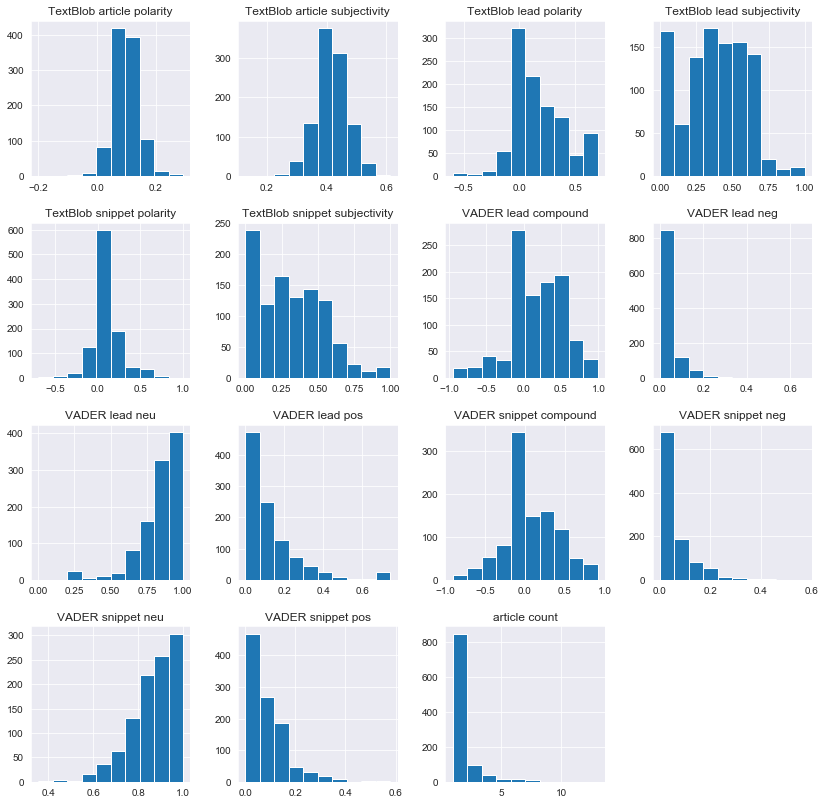

In [108]:
# plot statistical distributions of article sentiment
import matplotlib.pyplot as plt
axes = sentiment_counts.hist(figsize=(14,14))